<small><i>Setember 2016 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Learning Representations using Deep Learning with TensorFlow

## Goals

+ To know a little bit about deep learning.
+ Check the basics of TensorFlow
 

## 1. Some background

This talk is about learning representations and deep learning. But before we get into that it is important to give some general background on where we are and what are our goals. 

Deep learning is one of the multiple techniques we find in the *Machine Learning* toolbox. 

So let me start briefly defining what machine learning is. We talk about machine learning when we build algorithms that adapt their outputs to previous experiences. In general, these previous experiences come in the form of *data*.

There are different branches in classical machine learning:
+ Supervised learning: Given a set of $\{(x_i,y_i)\}$ pairs, with $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$ we want to find a mapping from an input space $x_i$ to the output $y_i$. Typical problems in supervised learning would be, to assess the click through rate probability in advertisement, predict whether a credit card operation is legit or a fraud, etc. 
+ Unsupervised learning: This kind of learning is concerned with the description of data. In this case we are given just $x_i \in \mathbb{R}^d$ and we want to characterize this data. The most classic example of this brach is clustering, for example, we could segment customers according to their profiles in order to launch a marketing campaing. Today we will work in this setting with deep learning. 
+ Reinforcement learning: In reinforcement learning we are concerned with guiding the learning process using weak supervisory signals. For example we can give rewards if the systems moves towards the objective and some penalization otherwise. 

## 2. Deep Learning

Deep learning is the new bandwagon in the machine learning community. It has achieved top performance in many applications. Specially, those involving natural language processing or computer vision.

<img src="bandwagon.jpg">

### 2.1 But what is deep learning about?

This is not a new technique. We are talking of old good *neural networks* with very minor changes.

Remember what a neural network is:

A neural network is an ensemble technique. The idea is to combine very simple bricks together to build up a usually feedforward network.

The base functions are called neurons and are usually of the following form:

$$h(x) = \sigma({\bf w}^T {\bf x})$$

where $\sigma$ is a non-linear function. And here comes the first change that helped deep learning to take off. This non-linear function was usually the sigmoid function:

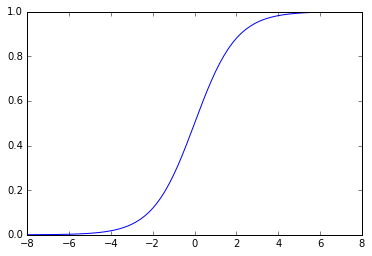

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-8,8,0.1)
sigmoid = 1./(1+np.exp(-x))
plt.plot(x,sigmoid)



it was seen that a simpler non-linear function would work better as it will tackle the problem of vanishing gradients when learning the network. The model that did that was the rectified linear unit, i.e.

$$relu(x) = \max(0,x)$$



(0, 2.0)

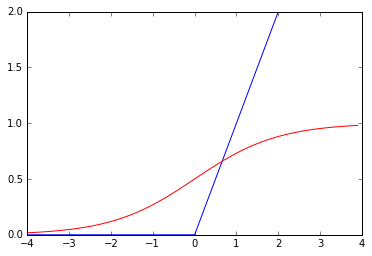

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4,4,0.1)
sigmoid = 1./(1+np.exp(-x))
relu = np.where(x>0,x,0)
plt.plot(x,relu)
plt.hold('on')
plt.plot(x,sigmoid,color='r')

ax = plt.gca()
ax.set_ylim(0,2.)



We do this in tensorflow:

In [3]:
import tensorflow as tf

In [4]:
x_rectified=tf.nn.relu(x)

In [5]:
x_rectified

<tf.Tensor 'Relu:0' shape=(80,) dtype=float64>

In [6]:
sess = tf.Session()
values=sess.run(x_rectified)
print values

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.55271368e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01   1.00000000e+00   1.10000000e+00
   1.20000000e+00   1.30000000e+00   1.40000000e+00   1.50000000e+00
   1.60000000e+00   1.70000000e+00

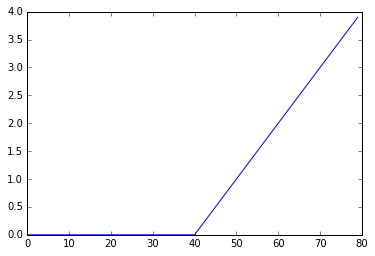

In [7]:
plt.plot(values)

In tensorflow, we can see two different stages, the **definition** of the computational graph and its **execution** in a session.

The basic model function is popularly called *neuron*. Let us define a single neuron:

<img src = './neuron.jpg' width = 400px>

In [8]:
%reset -f 
import tensorflow as tf

tf.reset_default_graph() 

x = tf.placeholder(dtype = 'float32', shape = [None,64], name = 'input')

w = tf.Variable(1*tf.random_normal([64, 1]))
b = tf.Variable(1*tf.random_normal([1, 1]))

neuron = tf.nn.relu(tf.add(tf.matmul(x,w),b))

We have introduced a couple of concepts here, *variables* and *placeholders*. Variables define the parameters with respect we are going to optimize, i.e. the model parameters. Placeholders are the inputs to the computational graph.

As we will see later relu's are nice for inner/hidden layers in neural networks, but they are a bad idea in the last layer. So let me just redefine the "neuron" as a simple linear combination of the inputs, i.e. 

In [9]:
neuron = tf.add(tf.matmul(x,w),b)

Let us create some simple problem. Let us take the digits problem in the sklearn and invent a derived problem, for example to distinguish between digits that have few pixels active versus those with larger set. 

In [10]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = np.where(np.sum(data.data,axis=1)>330., 1.,-1.)

In [11]:
X_train.shape

(1797, 64)

In machine learning, besides the model class, we have to define two more concepts: a measure of fitness or irritation, we call that *loss* or *cost function* and a way for reducing the loss, the *optimization method*.

In [12]:
y = tf.placeholder(dtype = 'float32', shape = [None,1], name = 'output')

#loss  = tf.reduce_sum(tf.abs(y-neuron))/16.
loss = tf.reduce_max(tf.abs(y-neuron))

In [13]:
opt = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(loss)

In [14]:
init = tf.initialize_all_variables()

In [15]:
sess = tf.Session()
sess.run(init)

In [16]:
N = X_train.shape[0] #number of samples
cost = []
batch_size=16
for i in xrange(10000):
    idx = np.random.randint(0,N,batch_size)
    xs = X_train[idx,:]
    ys = y_train[idx]
    sess.run(opt, feed_dict={x: xs, y: ys[:,np.newaxis]})
    
    if i%100==0:
        cost.append(sess.run(loss, feed_dict={x: X_train, y: y_train[:,np.newaxis]}))

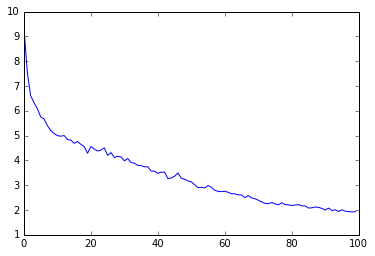

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost)

What we are seeing here is that the optimization function really reduces the loss function on the training set, as expected. We should check that it also decreases the loss on the a test set to guarantee that the model will generalize well. You can check it at home ;-).


We can save the session for future uses.

In [18]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./trial.ckpt")
print("Model saved in file: %s" % save_path)

Model saved in file: ./trial.ckpt


And we can restore the session, but we have to redefine the model again

In [19]:
%reset -f 
import tensorflow as tf

from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = np.where(np.sum(data.data,axis=1)>330., 1.,-1.)


tf.reset_default_graph() 
x = tf.placeholder(dtype = 'float32', shape = [None,64], name = 'input')
w = tf.Variable(1*tf.random_normal([64, 1]))
b = tf.Variable(1*tf.random_normal([1, 1]))
neuron = tf.add(tf.matmul(x,w),b)
y = tf.placeholder(dtype = 'float32', shape = [None,1], name = 'output')
loss = tf.reduce_max(tf.abs(y-neuron))
opt = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(loss)

sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, "./trial.ckpt")
print("Model restored.")

sess.run(neuron, feed_dict={x:X_train})

Model restored.


array([[ 0.00096101],
       [-0.82151961],
       [-0.40867317],
       ..., 
       [ 0.76692945],
       [-0.44280589],
       [ 0.27209777]], dtype=float32)

Observe that `feed_dict` contains only information relevant to the computational graph of `neuron`. In this case we do not need `y`.

### 2.2 Moving forward to "deep" representations

We can combine multiple layers of neurons. This will create a neural network. When the number of layers is sufficently large we call the network a *deep learner*. There are different kinds of NNs. In this basic tutorial we are concerned with NN composed of fully-connected layers.

<img src = './NN.jpg' width = 500px>

Let us define a feedforward model. Observe that our former definition of neuron can handle a full layer, i.e.

In [20]:
n_inputs = 1000
n_hidden_1 = 300

x = tf.placeholder("float", [None, n_inputs], name = "x")
w = tf.Variable(tf.random_normal([n_inputs,n_hidden_1]))
b = tf.Variable(tf.random_normal([n_hidden_1]))

layer1 = tf.nn.relu(tf.add(tf.matmul(x,w),b))

By stacking this same definition we can create a simple network:

In [21]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph() 
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 32  # 2nd layer num features
n_output = 1  # Output num features

# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_output], name='y')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_2, n_output]), name = 'output')
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'out': tf.Variable(c*tf.random_normal([n_output]), name = 'output')
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
output = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])

#loss = tf.reduce_mean(tf.pow(output - y, 2))
loss = tf.reduce_sum(tf.abs(output-y))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.initialize_all_variables()

In [22]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = data.target

In [23]:
sess = tf.Session()
sess.run(init)

N = X_train.shape[0] #number of samples
cost = []
batch_size=16
for i in xrange(10000):
    idx = np.random.randint(0,N,batch_size)
    xs = X_train[idx,:]
    ys = y_train[idx]
    sess.run(opt, feed_dict={x: xs, y: ys[:,np.newaxis], keep_prob: 0.9})
    
    if i%100==0:
        cost.append(sess.run(loss, feed_dict={x: X_train, y: y_train[:,np.newaxis], keep_prob:1.}))

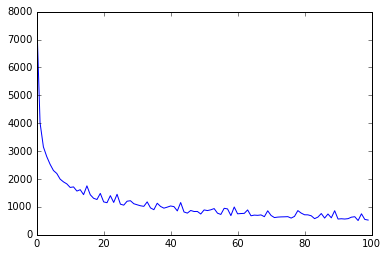

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost)

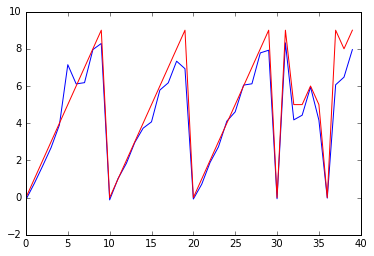

In [25]:
plt.plot(sess.run(output, feed_dict={x: X_train, keep_prob:1.})[0:40,0])
fig = plt.gcf()
fig.hold('on')
plt.plot(y_train[0:40],color='r')

## 3. Learning Representations

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px">Up to this point I have been deliverately clumsy and careless in the training process for the sake of not cluttering the code. However it is time to properly address this.</div>

In [26]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X = data.data/16.
y = data.target

from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3,random_state = 42)

In [27]:
import tensorflow as tf
import numpy as np
import tqdm

tf.reset_default_graph() 
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 32  # 2nd layer num features
n_output = 1  # Output num features

# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_output], name='y')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_2, n_output]), name = 'output')
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'out': tf.Variable(c*tf.random_normal([n_output]), name = 'output')
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
output = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])

#loss = tf.reduce_mean(tf.pow(output - y, 2))
loss = tf.reduce_sum(tf.abs(output-y))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

N = X_train.shape[0] #number of samples
cost = []
batch_size=16
for i in tqdm.tqdm(xrange(10000)):
    idx = np.random.randint(0,N,batch_size)
    xs = X_train[idx,:]
    ys = y_train[idx]
    sess.run(opt, feed_dict={x: xs, y: ys[:,np.newaxis], keep_prob: 0.9})
    
    if i%100==0:
        cost.append(sess.run(loss, feed_dict={x: X_test, y: y_test[:,np.newaxis], keep_prob:1.}))

100%|██████████| 10000/10000 [00:46<00:00, 213.62it/s]


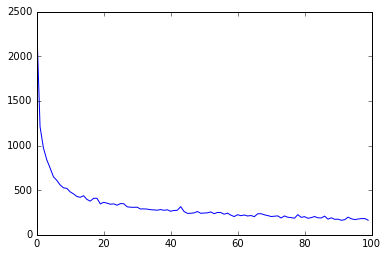

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost)

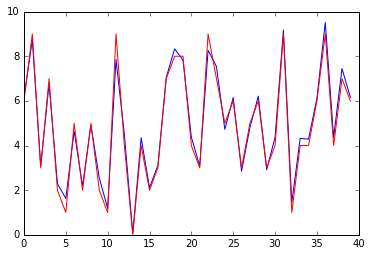

In [29]:
plt.plot(sess.run(output, feed_dict={x: X_test, keep_prob:1.})[0:40,0])
fig = plt.gcf()
fig.hold('on')
plt.plot(y_test[0:40],color='r')

Uffff, it still works ;-). Let us quantify how well.

In [30]:
ypred = sess.run(output,feed_dict={x: X_test, keep_prob: 1.})

print 'Accuracy (at the moment): ' + str(np.sum(np.where(np.abs(ypred-y_test[:,np.newaxis])<0.5,1.,0.))/y_test.shape[0])

Accuracy (at the moment): 0.85


Ok, so now, we can train a very basic "deep learner". Let us look a little bit into the parts of this model. 

+ So we have a set of layers, the output of one layer is a non-linear transformation of its input. This is true up to the last layer. 

+ In our previous example, the last layer acts as a supervised classifier.

Let us check that out by replacing the last layer of our former network with a random forest.

In [31]:
X_transformed = sess.run(layer_2, feed_dict={x: X_train, keep_prob: 1.})
X_test_transformed = sess.run(layer_2, feed_dict={x: X_test, keep_prob: 1.})

In [32]:
X_transformed.shape

(1257, 32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(11)
rf.fit(X_transformed,y_train)
rf.score(X_test_transformed,y_test)

0.93518518518518523

So it seems that efectively, the last layer of the network serves as a classifier while the rest is a transformation. The transformed data can be regarded as a new representation of the original data.

<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px">In particular, the network looks for a good transformation for the task at hand. In this case the task of regressing the number value.</div>

### 3.1 Learning unsupervised representations

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px">The task at hand can be very specific and constraining. If we want a general, multi-purpose representation, what task can we consider?</div>



One posible solution is to use an *autoencoder*. An autoencoder tries to learn the identity mapping, i.e. the input and the output are the same. However we can build an architecture that constraints/compresses information and then uncompresses it. Because this can be a little tricky we can instead reconstruct from a noisy version of our data using the *dropout layer*.

In [ ]:
import tensorflow as tf
import numpy as np
import tqdm

tf.reset_default_graph() 
# Network Parameters
n_input = 64
n_hidden_1 = 32  # 1st layer num features
n_hidden_2 = 10  # 2nd layer num features
n_hidden_3 = 32  # 3rd layer num features

# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_3, n_input]), name = 'output')
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'out': tf.Variable(c*tf.random_normal([n_input]), name = 'output')
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
output = tf.add(tf.matmul(layer_3, weights['out']), biases['out'])

loss = tf.reduce_mean(tf.pow(output - x, 2))
#loss = tf.reduce_sum(tf.abs(output-x))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

N = X_train.shape[0] #number of samples
cost = []
batch_size=16
for i in tqdm.tqdm(xrange(10000)):
    idx = np.random.randint(0,N,batch_size)
    xs = X_train[idx,:]
    ys = y_train[idx]
    sess.run(opt, feed_dict={x: xs, keep_prob: 0.9})
    
    if i%100==0:
        cost.append(sess.run(loss, feed_dict={x: X_test, keep_prob:1.}))

 82%|████████▏ | 8235/10000 [00:55<00:14, 125.41it/s]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost)

Let us check some testing images reconstruction:

In [ ]:
recons=sess.run(output, feed_dict={x:X_test[0:10,:], keep_prob:1.})

In [ ]:
for i in xrange(10):
    img_rec = recons[i]
    img_orig = X_test[i,:]
    img_rec.shape = [8,8]
    img_orig.shape = [8,8]
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img_orig, interpolation='nearest',cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img_rec, interpolation='nearest',cmap='gray')

And the final issue. All this is nice and that. But what is it useful for?

What if we could take the intermediate representation and use that in another setting? Does that representation has enough discriminative information for other tasks?

In [ ]:
X_train_compressed = sess.run(layer_2, feed_dict={x:X_train, keep_prob:1.})
X_test_compressed = sess.run(layer_2, feed_dict={x:X_test, keep_prob:1.})

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(11)
rf.fit(X_train_compressed,y_train)

rf.score(X_test_compressed,y_test)

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px">Let us check the representation ... oh, wait ... this is no longer an image ... and ... i don't know what it really is. However i can use this representation as a proxy of the original data for different tasks! 

Think now about privacy, and all this stuff ... Food for thought. ;-)</div>



## 4. Conclusions

+ We have seen what deep learning is about.
+ We did the basics of tensorflow
+ We know what learning representations means
+ We have food for thought